In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

In [5]:
data = pd.read_csv('arsenal_stats.csv')

In [10]:
data.shape

(153, 7)

In [12]:
data.head()

,Date,Comp,Venue,Result,Opponent,Formation,Referee
0,2020-08-29,Community Shield,Neutral,D,Liverpool,3-4-3,Andre Marriner
1,2020-09-12,Premier League,Away,W,Fulham,3-4-3,Chris Kavanagh
2,2020-09-19,Premier League,Home,W,West Ham,3-4-3,Michael Oliver
3,2020-09-23,EFL Cup,Away,W,Leicester City,3-4-3,Peter Bankes
4,2020-09-28,Premier League,Away,L,Liverpool,3-4-3,Craig Pawson


In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       153 non-null    object
 1   Comp       153 non-null    object
 2   Venue      153 non-null    object
 3   Result     153 non-null    object
 4   Opponent   153 non-null    object
 5   Formation  153 non-null    object
 6   Referee    153 non-null    object
dtypes: object(7)
memory usage: 8.5+ KB


In [19]:
data.describe()

,Date,Comp,Venue,Result,Opponent,Formation,Referee
count,153,153,153,153,153,153,153
unique,153,6,4,4,39,9,42
top,2020-08-29,Premier League,Away,W,Liverpool,4-2-3-1,Michael Oliver
freq,1,114,75,87,10,69,16


## Data Exploration and Analysis

### Win-Loss ratio

In [44]:
win_loss_ratio = data['Result'].value_counts(normalize=True)
print("Win-Loss Ratio:")
print(win_loss_ratio)

Win-Loss Ratio:
W    0.572368
L    0.269737
D    0.157895
Name: Result, dtype: float64


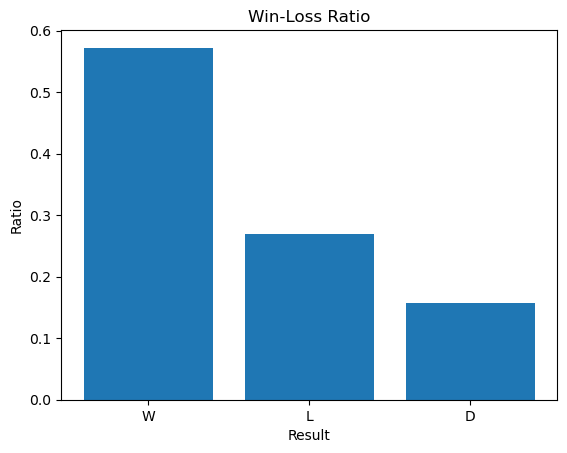

In [45]:
plt.bar(win_loss_ratio.index, win_loss_ratio.values)
plt.xlabel('Result')
plt.ylabel('Ratio')
plt.title('Win-Loss Ratio')
plt.show()

### Home vs. Away Performance 

In [46]:
home_performance = data[data['Venue'] == 'Home']
away_performance = data[data['Venue'] == 'Away']

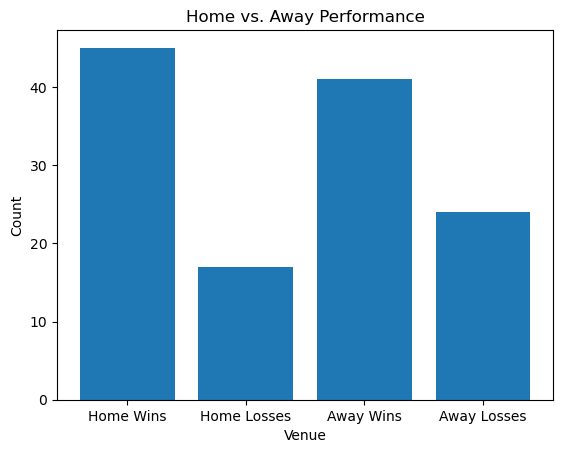

In [49]:
home_wins = home_performance[home_performance['Result'] == 'W'].shape[0]
home_losses = home_performance[home_performance['Result'] == 'L'].shape[0]
away_wins = away_performance[away_performance['Result'] == 'W'].shape[0]
away_losses = away_performance[away_performance['Result'] == 'L'].shape[0]

labels = ['Home Wins', 'Home Losses', 'Away Wins', 'Away Losses']
values = [home_wins, home_losses, away_wins, away_losses]

plt.bar(labels, values)
plt.xlabel('Venue')
plt.ylabel('Count')
plt.title('Home vs. Away Performance')
plt.show()

### Formation Analysis

Formation Counter:
4-2-3-1    69
4-3-3      53
3-4-3      14
4-4-1-1     7
4-1-4-1     6
4-4-2       1
5-4-1       1
4-3-2-1     1
Name: Formation, dtype: int64


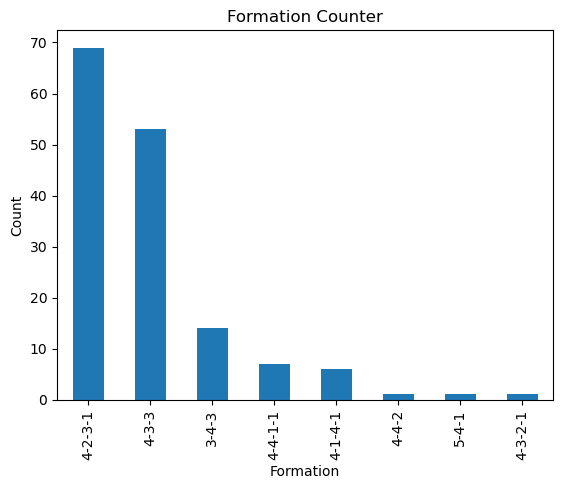

In [64]:
formation_count = data['Formation'].value_counts()
print("Formation Counter:")
print(formation_count)

# Viusalization - Bar chart
formation_count.plot(kind='bar')
plt.xlabel('Formation')
plt.ylabel('Count')
plt.title('Formation Counter')
plt.show()

Formation Analysis:
Result            D         L         W
Formation                              
3-4-3      0.142857  0.357143  0.500000
4-1-4-1    0.500000  0.166667  0.333333
4-2-3-1    0.144928  0.318841  0.536232
4-3-2-1         NaN       NaN  1.000000
4-3-3      0.169811  0.188679  0.641509
4-4-1-1         NaN  0.285714  0.714286
4-4-2           NaN       NaN  1.000000
5-4-1           NaN  1.000000       NaN


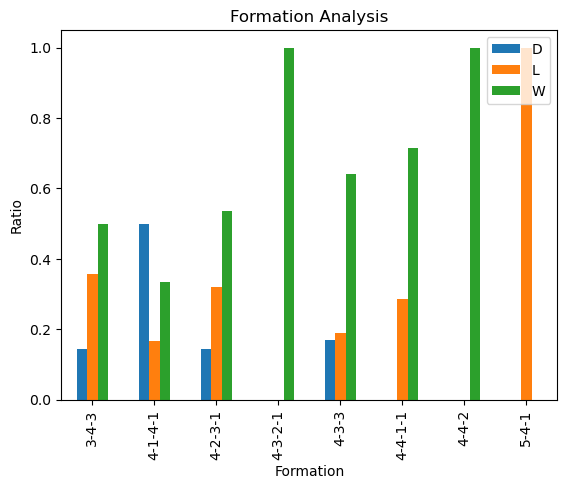

In [50]:
formation_performance = data.groupby('Formation')['Result'].value_counts(normalize=True).unstack()
print("Formation Analysis:")
print(formation_performance)

# Visualization - Grouped bar chart
formation_performance.plot(kind='bar')
plt.xlabel('Formation')
plt.ylabel('Ratio')
plt.title('Formation Analysis')
plt.legend(loc='upper right')
plt.show()